<a href="https://colab.research.google.com/github/shravaniloke/Netflix-Data-Analysis/blob/main/netflixproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load dataset
file_path = '/content/netflix_titles.csv'
df = pd.read_csv(file_path)


In [ ]:
# Drop missing values for simplicity

df.dropna(subset=['listed_in', 'description'], inplace=True)

In [ ]:
# Feature and target selection
X = df['description'] + ' ' + df['listed_in']
y = df['type']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Text vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.9812712826333712
              precision    recall  f1-score   support

       Movie       0.98      1.00      0.99      1214
     TV Show       1.00      0.94      0.97       548

    accuracy                           0.98      1762
   macro avg       0.99      0.97      0.98      1762
weighted avg       0.98      0.98      0.98      1762



In [ ]:
# Visualization
sns.set_style("whitegrid")


<ipython-input-11-5cba84036ee7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


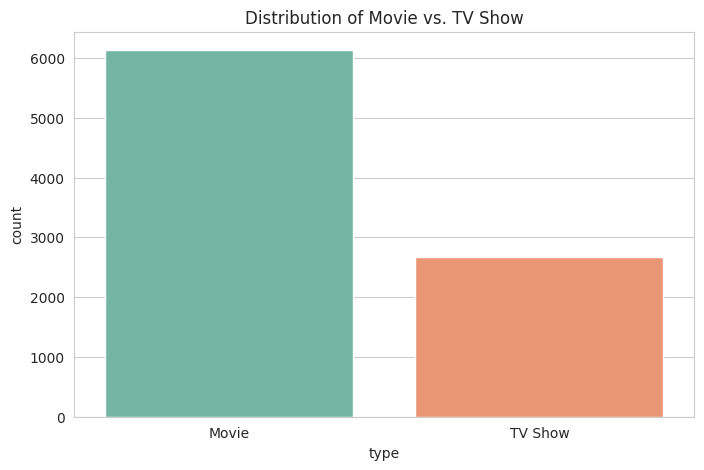

In [ ]:
# 1. Distribution of Movie vs. TV Show
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Movie vs. TV Show')
plt.show()

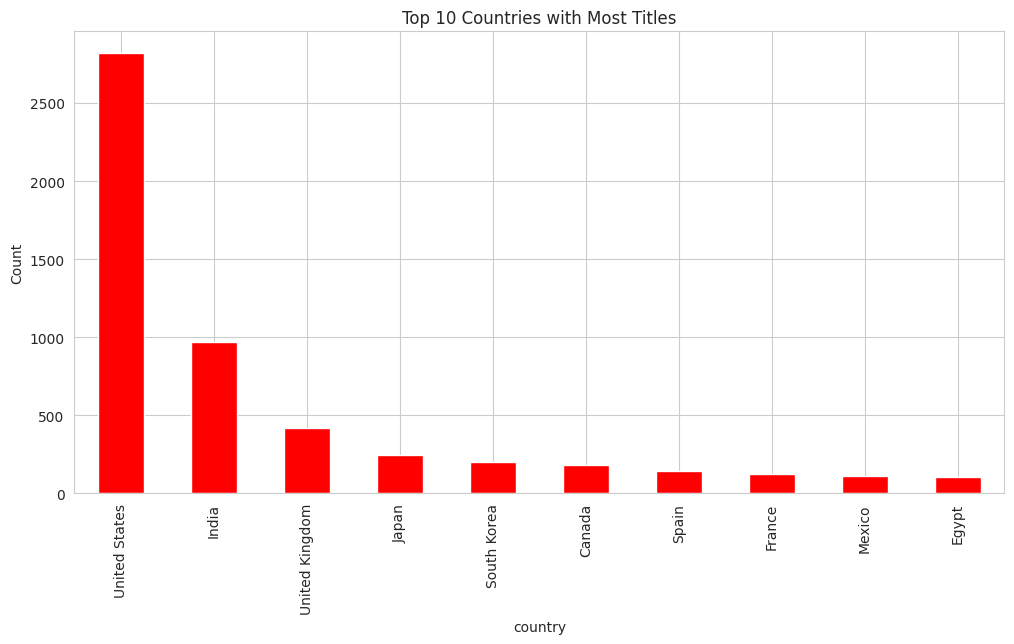

In [ ]:
# 2. Top 10 Countries with Most Titles
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(10).plot(kind='bar', color='red')
plt.title('Top 10 Countries with Most Titles')
plt.ylabel('Count')
plt.show()


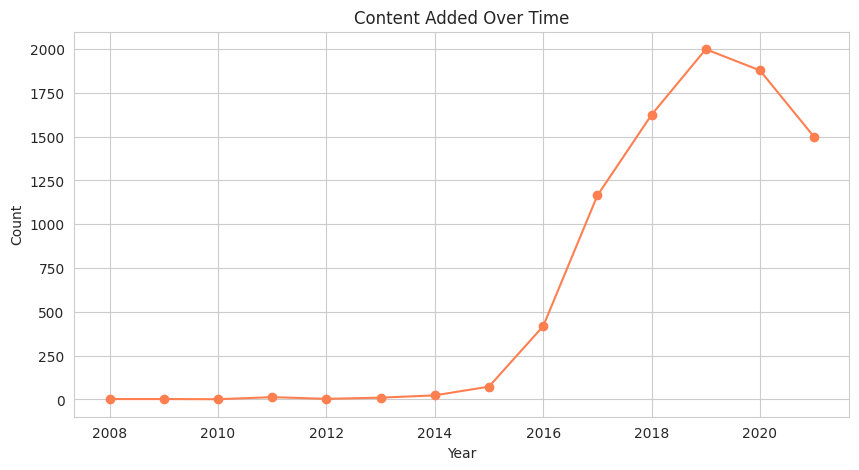

In [ ]:
# 3. Content Added Over Time
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True)
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='coral')
plt.title('Content Added Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()
